In [104]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr; import time as time
import matplotlib.colors as colors
import matplotlib.lines as mlines
from matplotlib.gridspec import GridSpec

dir='/mnt/lustre/koa/koastore/torri_group/air_directory/DCI-Project/'
folder_path = dir + 'Figures/plots/'
import os; os.makedirs(folder_path, exist_ok=True)

# Importing Model Data
check=False
dir='/mnt/lustre/koa/koastore/torri_group/air_directory/DCI-Project/'
 
# # dx = 1 km; Np = 1M; Nt = 5 min
# data=xr.open_dataset(dir+'../cm1r20.3/run/cm1out_1km_5min.nc', decode_timedelta=True) #***
# parcel=xr.open_dataset(dir+'../cm1r20.3/run/cm1out_pdata_1km_5min_1e6.nc', decode_timedelta=True) #***
# res='1km';t_res='5min'
# Np_str='1e6'

# # dx = 1km; Np = 50M; Nz = 95
# #Importing Model Data
# dir2='/home/air673/koa_scratch/'
# data=xr.open_dataset(dir2+'cm1out_1km_1min_95nz.nc', decode_timedelta=True) #***
# parcel=xr.open_dataset(dir2+'cm1out_pdata_1km_1min_95nz.nc', decode_timedelta=True) #***
# res='1km'; t_res='1min_95nz'; Np_str='50e6'

# dx = 250m; Np = 50M
#Importing Model Data
dir2='/home/air673/koa_scratch/'
data=xr.open_dataset(dir2+'cm1out_250m_1min_50M.nc', decode_timedelta=True) #***
parcel=xr.open_dataset(dir2+'cm1out_pdata_250m_1min_50M.nc', decode_timedelta=True) #***
res='250m'; t_res='1min'; Np_str='50e6'

In [105]:
#Import PlottingFunctions
import sys
dir2='/mnt/lustre/koa/koastore/torri_group/air_directory/DCI-Project/'
path=dir2+'../Functions/'
sys.path.append(path)

import NumericalFunctions
from NumericalFunctions import * # import NumericalFunctions 
import PlottingFunctions
from PlottingFunctions import * # import PlottingFunctions


# # Get all functions in NumericalFunctions
# import inspect
# functions = [f[0] for f in inspect.getmembers(NumericalFunctions, inspect.isfunction)]
# functions

In [106]:
# #Grid Stretching
# ######################################################################################################################################################
# from matplotlib.gridspec import GridSpec
# zfs = data['zf'].values;zhs = data['zh'].values
# zfs_diff = np.diff(zfs) 
# fig = plt.figure(figsize=(10, 4))
# gs = GridSpec(1, 2, figure=fig)
# ax0 = fig.add_subplot(gs[0, 0]); ax1 = fig.add_subplot(gs[0, 1]) 

# ax0.set_xlabel('z grid');ax0.set_ylabel('z (km)')
# ax1.set_xlabel('dz');ax1.set_ylabel('z (km)')
# ax0.plot(np.arange(len(zfs)), zfs);ax0.set_title('z level heights (kms)')
# ax1.plot(zfs_diff*1000,zhs);ax1.set_title('z level height diffs (m)')

In [107]:
################################################################################################################
#LOADING DATA

In [108]:
################################################################################################################
#FUNCTIONS

In [109]:
def PlotLandCoast(ax,linewidth=10,alpha=0.6,correction=0.003):
    xh=data['xh']-data['xh'][0]
    ax.axvline(x=xh[-1] * ocean_fraction, color='black', linewidth=3, label='Coastline')
    # Add land and sea colors
    seacolor = (0, 89 / 255, 179 / 255)
    landcolor = (139 / 255, 69 / 255, 19 / 255)
    ax.axhline(y=0, xmin=0, xmax=ocean_fraction-correction, color=seacolor, linewidth=linewidth,alpha=alpha)
    ax.axhline(y=0, xmin=ocean_fraction+correction, xmax=1, color=landcolor, linewidth=linewidth,alpha=alpha)
    

def GetMeanData(var_name,t,zh):
    print('Calculating Variable Mean')
    out = data[var_name].isel(time=t, zh=zh).mean(dim='yh').data
    print('Done')
    return out

In [110]:
################################################################################################################
#CONFIGURATION PLOTTING FUNCTIONS

In [111]:
#2D CONFIGURATION PLOT
ocean_fraction=2/8

def plot_domain_configuration(ax, ocean_fraction=ocean_fraction, bottom=0, top=200, left=0, right=512):
    center = left + ((right - left) * ocean_fraction)
    mid_y = (bottom + top) / 2  # Middle of y-axis for text

    # Axis labels and title
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    ax.set_title(f'Domain Configuration')

    ax.set_xlim(left, right)
    ax.set_xticks([left, right])

    ax.set_ylim(bottom, top)
    ax.set_yticks([bottom, top])

    # Colors
    seacolor = (0, 89/255, 179/255)
    landcolor = (139/255, 69/255, 19/255)

    # Text labels with vertical centering
    ax.text((left + center) / 2, mid_y, 'Sea', va='center', ha='center')
    ax.axvspan(left, center, color=seacolor, alpha=0.3)

    ax.text((right + center) / 2 - 10, mid_y, 'Land', va='center', ha='center')
    ax.axvspan(center, right, color=landcolor, alpha=0.3)

    # Center line
    ax.axvline(x=center, color='black', linewidth=3)

# #PLOTTING
# fig, ax = plt.subplots(figsize=(10, 2))  # Aspect ratio 5 means height = width/5
# plot_domain_configuration(ax)

In [112]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np

#3D CONFIGURATION PLOT
ocean_fraction=2/8
def get_corners(x_max, y_max, z_max):
    """Define 8 corners of the 3D box."""
    return np.array([
        [0, 0, 0],
        [x_max, 0, 0],
        [x_max, y_max, 0],
        [0, y_max, 0],
        [0, 0, z_max],
        [x_max, 0, z_max],
        [x_max, y_max, z_max],
        [0, y_max, z_max],
    ])


def get_edges(corners):
    """Return list of 12 edges as pairs of corner points."""
    return [
        [corners[0], corners[1]],
        [corners[1], corners[2]],
        [corners[2], corners[3]],
        [corners[3], corners[0]],
        [corners[4], corners[5]],
        [corners[5], corners[6]],
        [corners[6], corners[7]],
        [corners[7], corners[4]],
        [corners[0], corners[4]],
        [corners[1], corners[5]],
        [corners[2], corners[6]],
        [corners[3], corners[7]],
    ]


def plot_box_edges(ax, edges):
    """Plot the box edges as black lines."""
    box_lines = Line3DCollection(edges, colors='black', linewidths=1.5)
    ax.add_collection3d(box_lines)


def configure_ticks_and_hide_hashes(ax, x_max, y_max, z_max):
    """Set ticks locations, pad, and hide tick marks (hashes)."""
    ax.tick_params(axis='x', pad=2)
    ax.tick_params(axis='y', pad=-2)
    ax.tick_params(axis='z', pad=-2)

    ax.set_xticks(np.linspace(x_max, 0, 5))
    ax.set_yticks(np.linspace(y_max, 0, 5))
    ax.set_zticks(np.linspace(0, z_max, 6))

    ax.xaxis._axinfo['ticklabel_direction'] = -1  # default is 1
    ax.yaxis._axinfo['ticklabel_direction'] = -1
    ax.zaxis._axinfo['ticklabel_direction'] = -1

    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis._axinfo['tick']['inward_factor'] = 0
        axis._axinfo['tick']['outward_factor'] = 0
        axis._axinfo['tick']['color'] = (0, 0, 0, 0)  # fully transparent

def plot_surface_planes(ax, x_max, y_max, ocean_fraction, seacolor, landcolor):
    """Plot translucent sea and land surface planes."""
    # Land surface
    xx, yy = np.meshgrid(
        np.linspace(x_max * ocean_fraction, x_max, 2),
        np.linspace(0, y_max, 2)
    )
    zz = np.zeros_like(xx)
    ax.plot_surface(xx, yy, zz, color=landcolor, alpha=0.3)

    # Sea surface
    xx, yy = np.meshgrid(
        np.linspace(0, x_max * ocean_fraction, 2),
        np.linspace(0, y_max, 2)
    )
    ax.plot_surface(xx, yy, zz, color=seacolor, alpha=0.3)


def add_surface_labels(ax, x_max, y_max, ocean_fraction):
    """Add text labels 'Sea' and 'Land' slightly above surfaces."""
    ax.text(
        x_max * ocean_fraction / 2 - 20,
        y_max / 2 + 20,
        0.1,
        'Sea',
        color='blue',
        fontsize=12,
        fontfamily='sans-serif',
        weight='normal'
    )
    ax.text(
        x_max * ocean_fraction + (x_max - x_max * ocean_fraction) / 2 - 20,
        y_max / 2 + 20,
        0.1,
        'Land',
        color='brown',
        fontsize=12,
        fontfamily='sans-serif',
        weight='normal'
    )


def set_axis_labels_and_view(ax):
    """Set axis labels with custom padding and view angle."""
    ax.set_xlabel('x(km)', labelpad=-33)
    ax.set_ylabel('y (km)', labelpad=-27)
    ax.set_zlabel('z (km)', labelpad=-25)

    # Rotate view so Y axis is on left
    ax.view_init(elev=20, azim=50)


def plot_domain_3d(ax,x_max=512, y_max=200, z_max=25, ocean_fraction=ocean_fraction):
    """Main plotting function assembling all parts."""

    # Colors
    seacolor = (0, 89 / 255, 179 / 255)
    landcolor = (139 / 255, 69 / 255, 19 / 255)

    # Setup box corners and edges
    corners = get_corners(x_max, y_max, z_max)
    edges = get_edges(corners)

    # Plot box edges
    plot_box_edges(ax, edges)

    # Set axis limits (reversed axes)
    ax.set_xlim(x_max, 0)
    ax.set_ylim(y_max, 0)
    ax.set_zlim(0, z_max)

    # Control aspect ratio (X:Y:Z)
    # ax.set_box_aspect([5, 2, 1])

    # Configure ticks and hide tick marks
    configure_ticks_and_hide_hashes(ax, x_max, y_max, z_max)

    # Plot translucent sea and land surfaces
    plot_surface_planes(ax, x_max, y_max, ocean_fraction, seacolor, landcolor)

    # Add 'Sea' and 'Land' labels
    add_surface_labels(ax, x_max, y_max, ocean_fraction)

    # Axis labels and view
    set_axis_labels_and_view(ax)

    # Tight layout and margins
    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95)


def replace_z_ticks(ax, x_pos, y_pos, z_adj, z_max, num_ticks=6, offset=15):
    """Replace Z axis ticks with custom text at shifted 3D positions."""
    z_ticks = np.linspace(0, z_max, num_ticks)
    
    # Hide the default z tick labels
    ax.set_zticklabels([])
    
    # Add custom labels at shifted positions
    for z in z_ticks:
        ax.text(
            x_pos,             # Shifted x position (further into the box)
            y_pos,             # Shifted y position
            z+z_adj,                 # Actual z tick position
            f'{z:.0f}',        # Label text
            color='black',
            fontsize=10,
            ha='right',        # Horizontal alignment
            va='center'        # Vertical alignment
        )

        
# #PLOTTING
# fig = plt.figure(figsize=(8, 5))  # Size appropriate for 5:2 aspect
# gs = gridspec.GridSpec(1, 1)

# # Add subplot using GridSpec
# ax = fig.add_subplot(gs[0], projection='3d')

# # Run your 3D plot function
# plot_domain_3d(ax)
# replace_z_ticks(ax, x_pos=-15, y_pos=200, z_max=25, num_ticks=6)

In [113]:
################################################################################################################
#PLOTTING FUNCTIONS

In [114]:
def plot_alongcoast_vertical_u(t, data, ocean_fraction, ax, maxlev=20, index_adjust=0, font_size=12, dpi=300):
    pad = 0

    zh_slice = slice(0, np.where(data['zh'] < maxlev)[0][-1])
    alongcoast_w = GetMeanData('winterp', t, zh_slice)
    alongcoast_qv = GetMeanData('qv', t, zh_slice)
    alongcoast = GetMeanData('uinterp', t, zh_slice)

    # Limiting W Data Above Threshold Value
    alongcoast_w[alongcoast_w < 0.1] = 0  # Thresholding small values

    # Get Axis Data
    xh = data['xh'] - data['xh'][0]
    yh = data['zh'][zh_slice]
    
    cmap='RdBu_r';cmap='bwr'
    c = ax.contourf(xh, yh, alongcoast, cmap='bwr', levels=20)
    cbar = fig.colorbar(c, ax=ax, pad=pad)
    cbar.set_label(r'$w\ (\mathrm{m\,s^{-1}}$)', fontsize=font_size)
    cbar.ax.yaxis.label.set_size(font_size)
    cbar.ax.tick_params(labelsize=font_size)

    ax.grid(True, linestyle=':', color='black')

    # Plot W and QV Contours
    contour_w = ax.contour(xh, yh, alongcoast_w, linestyles='dotted', linewidths=1.5, colors='black', alpha=0.75)

    contour_qv = ax.contour(xh, yh, alongcoast_qv * 1000, linewidths=1, colors='blue', alpha=0.75)
    ax.clabel(contour_qv, inline=True, fontsize=font_size, fmt='%1.1f', inline_spacing=5)

    # contour_qi = ax.contour(xh, yh, qi_data, linestyles='dashed', linewidths=1, colors='blue', alpha=0.75)


    # Get time information for labeling
    ([days, hours, mins], _) = get_time(data, t + index_adjust, (0, 6, 0))
    # ax.set_title(f'Along-coast Vertical Plot at t = {t+index_adjust} = {days}:{hours}:{mins}', fontsize=font_size)

    # Legend handles
    handle_time = mlines.Line2D([], [], color='none', label=f't = {t+index_adjust} = {days}:{hours}:{mins}')
    handle_c = mlines.Line2D([], [], color='black', lw=3, label='Coastline')
    handle_qi = mlines.Line2D([], [], color='blue', linestyle='dashed', label=r'Ice ($q_i$)')
    handle_qv = mlines.Line2D([], [], color='blue', label=r'Water Vapor ($q_v$)')
    handle_w = mlines.Line2D([], [], color='black', linestyle='dotted',
                            label=f'Vertical Velocity (w) ' + r'(≥ 0.1 $\mathrm{m\,s}^{-1}$)')
    legend = ax.legend(handles=[handle_qv, handle_w, handle_c, handle_time], loc='upper right', fontsize=font_size)
    for text in legend.get_texts():
        text.set_fontsize(font_size)

    ax.set_xlabel('x (km)', fontsize=font_size)
    ax.set_ylabel('z (m)', fontsize=font_size)
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    ax.set_ylim(bottom=0)

    # Plot coastline
    PlotLandCoast(ax)




# # Example call
# t = 100 if t_res == '5min' else 100 * 5
# channel_aspect_ratio = 5
# figwidth = 25
# fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(figwidth, figwidth / channel_aspect_ratio), dpi=dpi)
# plot_alongcoast_vertical_u(t, data, ocean_fraction, axes)

# # # Save figure
# # save_path = os.path.join(folder_path, "verticalu.jpg")
# # plt.savefig(save_path, dpi=dpi)
# # # plt.close(fig)
# # # print(f"Figure saved at {save_path}")

In [115]:
def plot_single_horizontal_wind(t, data, ax, var, title, c_label, ocean_fraction, font_size=12, index_adjust=0):
    zlev = 3  # Vertical level

    # Get data
    field = data[var].isel(time=t, zh=zlev).data

    # Normalize with balanced vmin and vmax
    n_levels = 15
    vmin = -np.max(abs(field))
    vmax = np.max(abs(field))
    levels = np.linspace(vmin, vmax, n_levels)
    norm = colors.BoundaryNorm(boundaries=levels, ncolors=n_levels)
    cmap = plt.get_cmap('bwr', n_levels)

    # Axis coordinates
    xh = data['xh'] - data['xh'][0]
    yh = data['yh'] - data['yh'][0]

    # Plot contourf
    contour = ax.contourf(xh, yh, field, cmap=cmap, norm=norm, levels=levels)
    cbar = plt.colorbar(contour, ax=ax, pad=0)
    cbar.set_label(c_label, fontsize=font_size)
    cbar.ax.tick_params(labelsize=font_size)
    cbar.ax.yaxis.label.set_size(font_size)

    # Plot coastline
    
    ax.axvline(x=xh[-1] * ocean_fraction, color='black', linewidth=3, label='Coastline')

    # Get time info
    ([days, hours, mins], _) = get_time(data, t + index_adjust, (0, 6, 0))
    value = data['zh'][zlev].values

    # Legend
    handle_time = mlines.Line2D([], [], color='none', label=f't = {t+index_adjust} = {days}:{hours}:{mins}')
    handle_z = mlines.Line2D([], [], color='none', label= f'z = {data['zh'][zlev].item()*1000:.0f} m')
    handle_c = mlines.Line2D([], [], color='black', lw=3, label='Coastline')
    legend = ax.legend(handles=[handle_c, handle_time, handle_z], loc='upper right', fontsize=font_size)
    for text in legend.get_texts():
        text.set_fontsize(font_size)

    # Labels and ticks
    ax.set_xlabel('x (km)', fontsize=font_size)
    ax.set_ylabel('y (km)', fontsize=font_size)
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    
# # Example call
# t = 100 if t_res == '5min' else 100 * 5
# channel_aspect_ratio = 5
# figwidth = 25
# dpi = 300

# # Create figure and GridSpec
# fig = plt.figure(figsize=(figwidth, figwidth / channel_aspect_ratio * 2), dpi=dpi)
# gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1, 1], hspace=0.25)

# # Create subplots
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[1, 0])

# # Plot both wind variables
# plot_single_horizontal_wind(t, data, ax1, 'winterp', 'Horizontal Plot of Vertical Velocity', r'$w\ (m\ s^{-1})$', ocean_fraction, index_adjust=0)
# plot_single_horizontal_wind(t, data, ax2, 'uinterp', 'Horizontal Plot of Zonal Wind', r'$u\ (m\ s^{-1})$', ocean_fraction, index_adjust=0)

# # Optional: Save figure
# # save_path = os.path.join(folder_path, "horizontalw-u_combined.jpg")
# # plt.savefig(save_path, dpi=dpi)
# # # print(f"Figure saved at {save_path}")

In [116]:
# def plot_alongcoast_water_vapor(t, data, ocean_fraction, ax, maxlev=5, index_adjust=0, dpi=300):
#     print(f'Plotting Along-coast Water Vapor Mixing Ratio for time step {t}/{len(data["time"])}')
#     pad=0

#     zh_slice=slice(0, np.where(data['zh'] < maxlev)[0][-1])
#     alongcoast = GetMeanData('qv',t,zh_slice)

#     #Get Axis Data
#     xh=data['xh']-data['xh'][0]
#     yh=data['zh'][zh_slice]
    
#     c = ax.contourf(xh,yh,alongcoast, cmap='Blues', levels=15)
#     cbar = fig.colorbar(c, ax=ax, pad=pad)
#     cbar.set_label(r'$kg\ kg^{-1}$')
#     ax.grid(True, linestyle=':', color='black')

#     # Plot coastline
#     PlotLandCoast(ax)

#     # Get time information for labeling
#     ([days, hours, mins], _) = get_time(data, t + index_adjust, (0, 6, 0))

#     ax.set_title(f'Along-coast Vertical Plot of Water Vapor Mixing Ratio at t = {t+index_adjust} = {days}:{hours}:{mins}')
#     ax.legend(loc='upper right')
#     ax.set_xlabel('x (km)')
#     ax.set_ylabel('z (m)')
#     ax.set_ylim(bottom=0)


# # Example call
# t = 100 if t_res == '5min' else 100 * 5
# channel_aspect_ratio = 5
# figwidth = 25
# fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(figwidth, figwidth / channel_aspect_ratio), dpi=dpi)
# plot_alongcoast_water_vapor(t, data, ocean_fraction, axes)

# # # Save figure
# # save_path = os.path.join(folder_path, "verticalwatervapor.jpg")
# # plt.savefig(save_path, dpi=dpi)
# # # plt.close(fig)
# # # print(f"Figure saved at {save_path}")

In [117]:
def plot_alongcoast_clouds(t, data, ocean_fraction, ax, maxlev=20, index_adjust=0, font_size=12, dpi=300):
    pad = 0

    zh_slice = slice(0, np.where(data['zh'] < maxlev)[0][-1])
    alongcoast_w = GetMeanData('winterp', t, zh_slice)
    alongcoast_qv = GetMeanData('qv', t, zh_slice)
    qc_data = GetMeanData('qc', t, zh_slice)
    qi_data = GetMeanData('qi', t, zh_slice)
    alongcoast = (qc_data + qi_data) * 1000

    # Limiting W Data Above Threshold Value
    alongcoast_w[alongcoast_w < 0.1] = 0  # Thresholding small values

    # Limiting QCQI Data Above Threshold Value
    alongcoast[alongcoast < 1e-6] = 0  # Thresholding small values

    # Get Axis Data
    xh = data['xh'] - data['xh'][0]
    yh = data['zh'][zh_slice]

    c = ax.contourf(xh, yh, alongcoast, cmap='Blues', levels=15)
    cbar = fig.colorbar(c, ax=ax, pad=pad)
    cbar.set_label(r'$q_c + q_i\ (\mathrm{kg\,kg^{-1}}$)', fontsize=font_size)
    cbar.ax.yaxis.label.set_size(font_size)
    cbar.ax.tick_params(labelsize=font_size)

    ax.grid(True, linestyle=':', color='black')

    # Plot W and QV Contours
    contour_w = ax.contour(xh, yh, alongcoast_w, linestyles='dotted', linewidths=1.5, colors='black', alpha=0.75)

    contour_qv = ax.contour(xh, yh, alongcoast_qv * 1000, linewidths=1, colors='blue', alpha=0.75)
    ax.clabel(contour_qv, inline=True, fontsize=font_size, fmt='%1.1f', inline_spacing=5)

    contour_qi = ax.contour(xh, yh, qi_data, linestyles='dashed', linewidths=1, colors='blue', alpha=0.75)

    # Plot coastline
    PlotLandCoast(ax)

    # Get time information for labeling
    ([days, hours, mins], _) = get_time(data, t + index_adjust, (0, 6, 0))
    # ax.set_title(f'Along-coast Vertical Plot at t = {t+index_adjust} = {days}:{hours}:{mins}', fontsize=font_size)

    # Legend handles
    handle_time = mlines.Line2D([], [], color='none', label=f't = {t+index_adjust} = {days}:{hours}:{mins}')
    handle_c = mlines.Line2D([], [], color='black', lw=3, label='Coastline')
    handle_qi = mlines.Line2D([], [], color='blue', linestyle='dashed', label=r'Ice ($q_i$)')
    handle_qv = mlines.Line2D([], [], color='blue', label=r'Water Vapor ($q_v$)')
    handle_w = mlines.Line2D([], [], color='black', linestyle='dotted',
                            label=f'Vertical Velocity (w) ' + r'(≥ 0.1 $\mathrm{m\,s}^{-1}$)')
    legend = ax.legend(handles=[handle_qv, handle_qi, handle_w, handle_c, handle_time], loc='upper right', fontsize=font_size)
    for text in legend.get_texts():
        text.set_fontsize(font_size)

    ax.set_xlabel('x (km)', fontsize=font_size)
    ax.set_ylabel('z (m)', fontsize=font_size)
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    ax.set_ylim(bottom=0)



# # Example call
# t = 100 if t_res == '5min' else 100 * 5
# channel_aspect_ratio = 5
# figwidth = 25
# fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(figwidth, figwidth / channel_aspect_ratio), dpi=dpi)
# plot_alongcoast_clouds(t, data, ocean_fraction, axes)

# # # Save figure
# # save_path = os.path.join(folder_path, "verticalwatervapor.jpg")
# # plt.savefig(save_path, dpi=dpi)
# # # plt.close(fig)
# # # print(f"Figure saved at {save_path}")

In [118]:
# def plot_alongcoast_prs_pert(t, data, ocean_fraction, ax, fig, maxlev=5, index_adjust=0, font_size=12):
#     print(f'Plotting Along-coast Vertical Pressure Perturbation for time step {t}/{len(data["time"])}')
#     pad = 0

#     # Select vertical levels up to maxlev
#     zh_slice = slice(0, np.where(data['zh'] < maxlev)[0][-1])
#     alongcoast = GetMeanData('prspert', t, zh_slice)

#     # Get horizontal and vertical axes
#     xh = data['xh'] - data['xh'][0]
#     yh = data['zh'][zh_slice]

#     # Filled contour plot
#     c = ax.contourf(xh, yh, alongcoast, cmap='RdBu_r', levels=15)
#     cbar = fig.colorbar(c, ax=ax, pad=pad)
#     cbar.set_label(r"$P'\ (\mathrm{Pa}$)", fontsize=font_size)
#     cbar.ax.tick_params(labelsize=font_size)
#     cbar.ax.yaxis.label.set_size(font_size)

#     # Grid
#     ax.grid(True, linestyle=':', color='black')

#     # Plot coastline
#     PlotLandCoast(ax)

#     # Get time label
#     ([days, hours, mins], _) = get_time(data, t + index_adjust, (0, 6, 0))

#     # Title and labels
#     ax.set_title(
#         f"Along-coast Vertical Plot at t = {t + index_adjust} = {days}:{hours}:{mins}",
#         fontsize=font_size
#     )
#     ax.set_xlabel('x (km)', fontsize=font_size)
#     ax.set_ylabel('z (m)', fontsize=font_size)
#     ax.tick_params(axis='both', which='major', labelsize=font_size)
#     ax.set_ylim(bottom=0)

#     # Add legend for coast
#     handle_c = mlines.Line2D([], [], color='black', lw=3, label='Coastline')
#     ax.legend(handles=[handle_c], loc='upper right', fontsize=font_size)

# # Example call
# t = 100 if t_res == '5min' else 100 * 5
# channel_aspect_ratio = 5
# figwidth = 25
# dpi = 300

# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(figwidth, figwidth / channel_aspect_ratio), dpi=dpi)
# plot_alongcoast_prs_pert(t, data, ocean_fraction, axes, fig, font_size=14)

# # Optional save
# # save_path = os.path.join(folder_path, "vertical_prspert.jpg")
# # plt.savefig(save_path, dpi=dpi)
# # plt.close(fig)
# # print(f"Figure saved at {save_path}")


In [119]:
################################################################################################################
#PLOTTING FIGURES

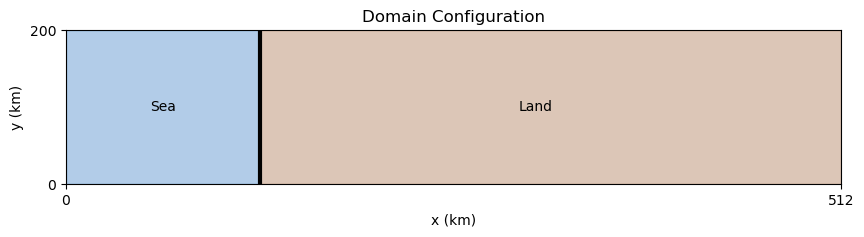

In [120]:
#DOMAIN CONFIGURATION ONE
fig, ax = plt.subplots(figsize=(10, 2))  # Aspect ratio 5 means height = width/5
plot_domain_configuration(ax)

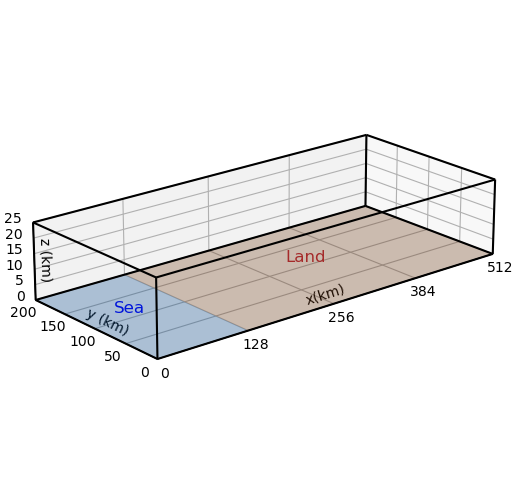

In [121]:
#DOMAIN CONFIGURATION TWO
fig = plt.figure(figsize=(8, 5))  # Size appropriate for 5:2 aspect
gs = gridspec.GridSpec(1, 1)

# Add subplot using GridSpec
ax = fig.add_subplot(gs[0], projection='3d')

# Run your 3D plot function
plot_domain_3d(ax)
replace_z_ticks(ax, x_pos=-15, y_pos=200, z_adj=2, z_max=25, num_ticks=6)
ax.set_box_aspect([512, 230, 95])  # x:y:z ratio, y is twice taller
# ax.set_title("Domain Configuration")

Calculating Variable Mean
Done
Calculating Variable Mean
Done
Calculating Variable Mean
Done
Calculating Variable Mean
Done
Calculating Variable Mean
Done
Calculating Variable Mean
Done
Calculating Variable Mean
Done


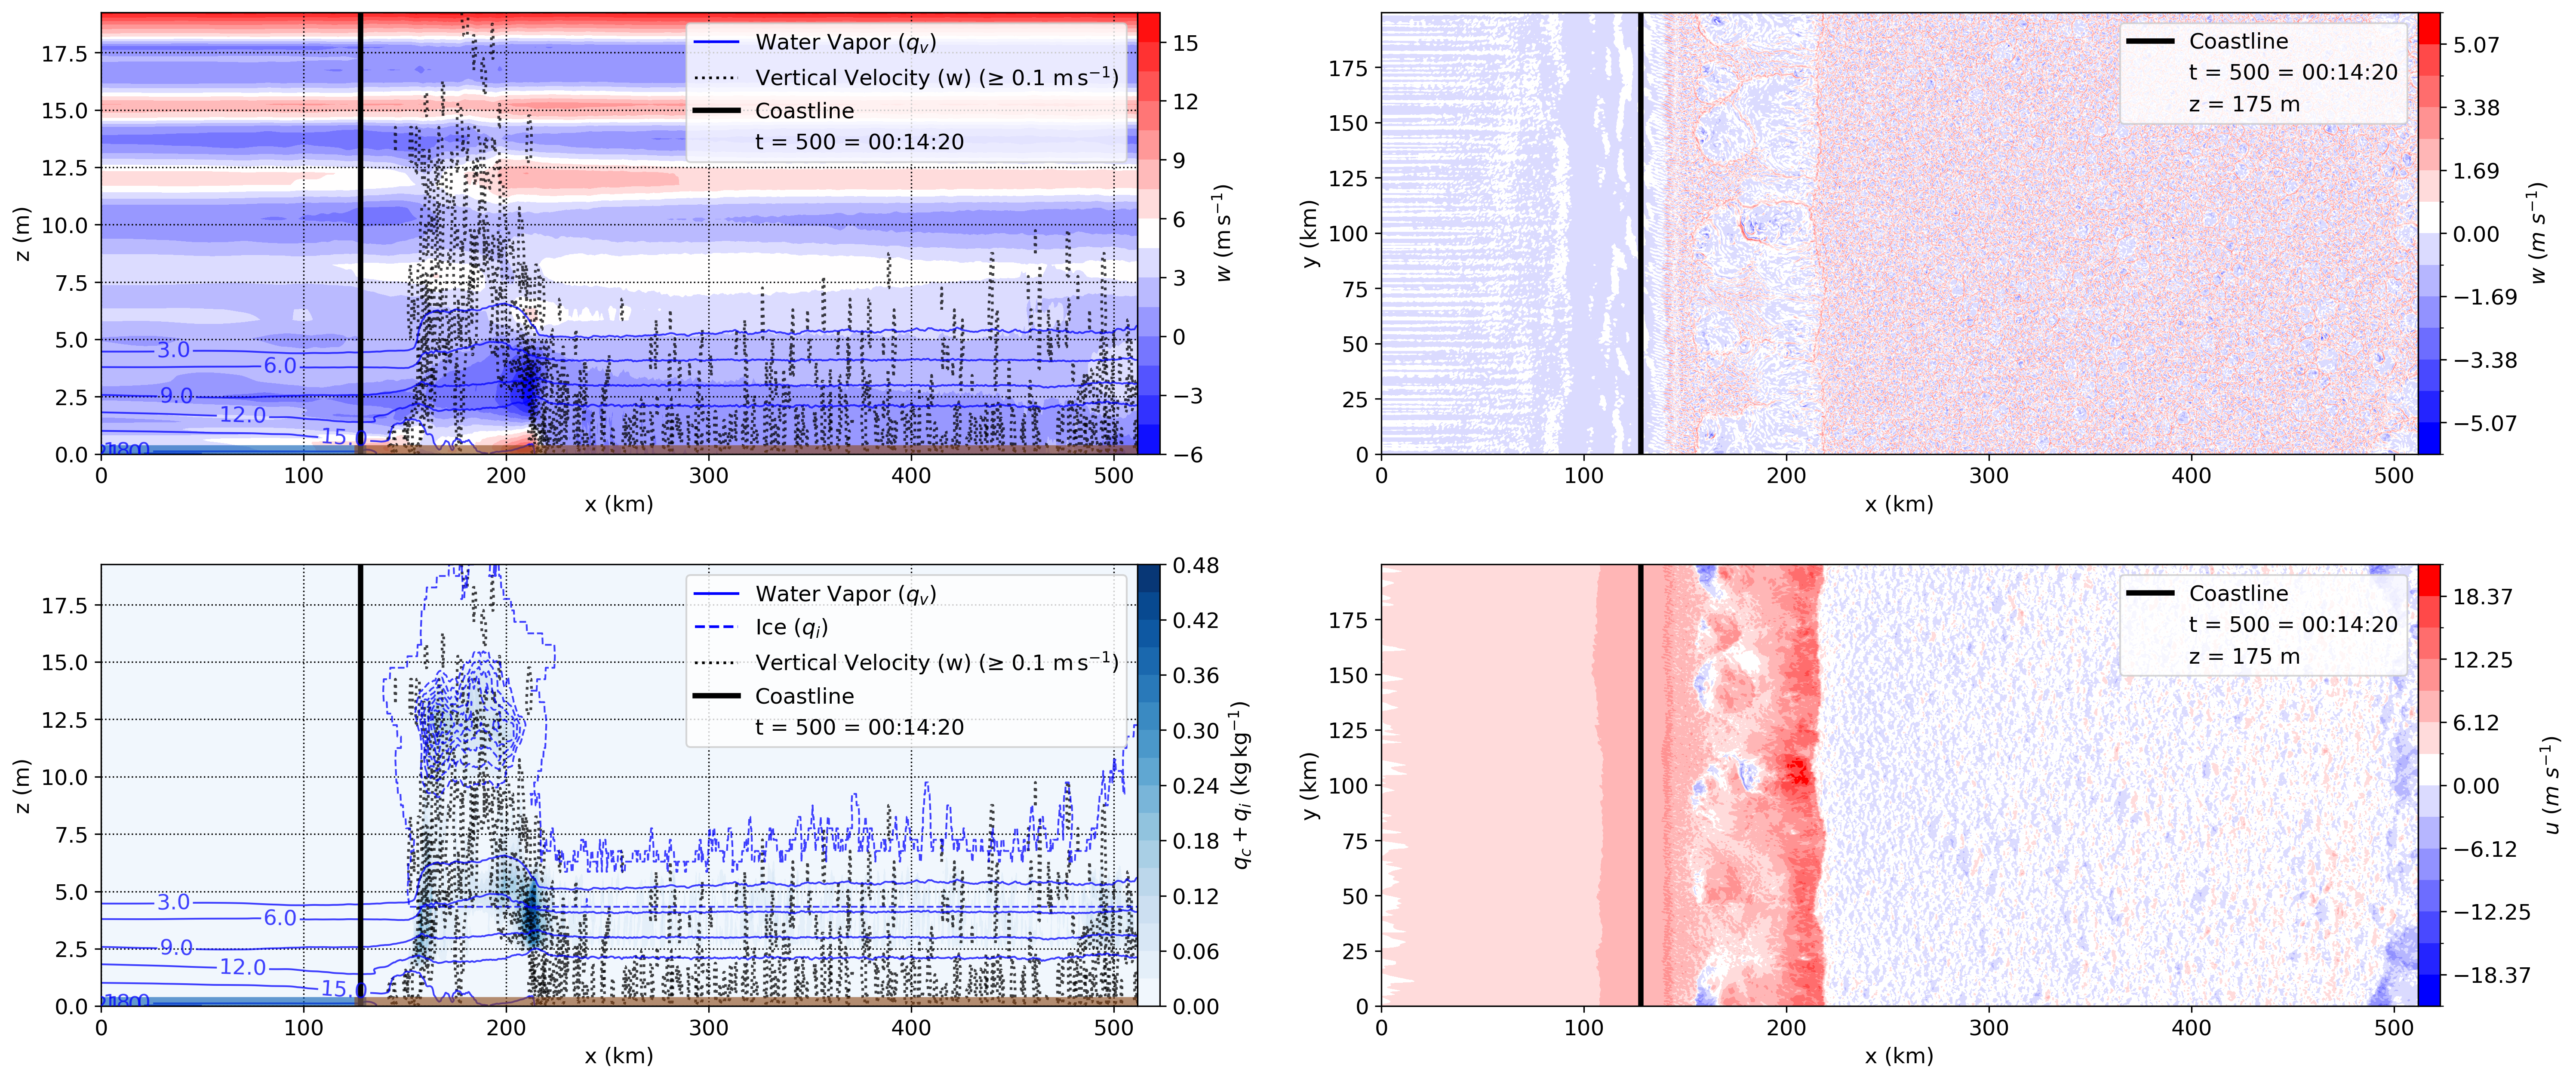

In [122]:
#COMBINED DOMAIN PLOTS
t = 100 if t_res == '5min' else 100 * 5
channel_aspect_ratio = 5
figwidth = 25
dpi = 300

# Create figure and 2x2 GridSpec
fig = plt.figure(figsize=(figwidth, figwidth / channel_aspect_ratio * 2), dpi=dpi)
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1], width_ratios=[1, 1], hspace=0.25, wspace=0.05)

# Create subplots
ax_v_u  = fig.add_subplot(gs[0, 0])  # Top-left: vertical U
ax_v_qv = fig.add_subplot(gs[1, 0])  # Bottom-left: vertical qv
ax_h_w  = fig.add_subplot(gs[0, 1])  # Top-right: horizontal w
ax_h_u  = fig.add_subplot(gs[1, 1])  # Bottom-right: horizontal u

# Plotting
plot_alongcoast_vertical_u(t, data, ax=ax_v_u, ocean_fraction=ocean_fraction, dpi=dpi, index_adjust=0, font_size=12)
plot_alongcoast_clouds(t, data, ocean_fraction, ax=ax_v_qv, dpi=dpi, index_adjust=0, font_size=12)

plot_single_horizontal_wind(t, data, ax_h_w, 'winterp', 'Horizontal Plot of Vertical Velocity', r'$w\ (m\ s^{-1})$', ocean_fraction, index_adjust=0)
plot_single_horizontal_wind(t, data, ax_h_u, 'uinterp', 'Horizontal Plot of Zonal Wind', r'$u\ (m\ s^{-1})$', ocean_fraction, index_adjust=0)

#SAVING
fig.savefig(f"PLOTS/Initial_ContourPlots_{res}_{t_res}_{Np_str}.jpg", dpi=300, bbox_inches='tight')

In [123]:
################################################################################################################

In [124]:
# ## Converts all figures to PDF
# ######################################################################################################################################################
# from reportlab.lib.pagesizes import letter
# from reportlab.pdfgen import canvas
# from PIL import Image
# import os

# def jpg_to_pdf(input_folder, output_pdf):
#     # Get a list of all JPG files in the input folder
#     jpg_files = [file for file in os.listdir(input_folder) if file.endswith('.jpg')]
#     jpg_files = ['domain_config.jpg','convergence.jpg','verticalu.jpg',
#                  'verticaltheta.jpg','verticalprspert.jpg','verticaltheta.jpg',
#                  'verticalwatervapor.jpg','horizontalw-u.jpg'] #***
    
#     # Create a PDF canvas
#     c = canvas.Canvas(output_pdf, pagesize=letter)

#     # Loop through each JPG file and add it to the PDF
#     for jpg_file in jpg_files:
#         # Open the JPG image using PIL
#         img = Image.open(os.path.join(input_folder, jpg_file))

#         # Calculate the aspect ratio to maintain image proportions
#         width, height = img.size
#         aspect_ratio = width / height

#         # Add the image to the PDF
#         c.setPageSize((width, height))
#         c.drawInlineImage(os.path.join(input_folder, jpg_file), 0, 0, width=width, height=height)

#         # Add a new page for the next image
#         c.showPage()

#     # Save the PDF
#     c.save()

# # Example usage:
# input_folder = folder_path
# output_pdf = folder_path + f'figures_062217_{res}.pdf'
# jpg_to_pdf(input_folder, output_pdf)